In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# 1. Tải dữ liệu issues từ file json

In [2]:
with open('issues1.json', 'r') as file:
    issues = json.load(file)

# 2. Tạo DataFrame chứa những dữ liệu cần thiết về issues

In [3]:
processed_issues = []
for issue in issues:
    important_data = {
        'number': issue['number'],
        'title': issue['title'],
        'author': issue['user']['login'],
        'labels': [label['name'] for label in issue['labels']],
        'state': issue['state'],
        'assignee': issue['assignee'],
        'assignees': issue['assignees'],
        'comments': issue['comments'],
        'created_at': issue['created_at'],
        'updated_at': issue['updated_at'],
        'closed_at': issue['closed_at'],
        'reactions': issue['reactions']['total_count']
    }
    processed_issues.append(important_data)

issues_frame = pd.DataFrame(processed_issues)
issues_frame

,number,title,author,labels,state,assignee,assignees,comments,created_at,updated_at,closed_at,reactions
0,92590,USER ERROR: BUG: Unreferenced static string to...,bestvcboy,[],open,None,[],1,2024-05-31T13:44:00Z,2024-05-31T13:52:00Z,None,0
1,92589,No way to get available audio driver names in ...,Variable-ind,[],open,None,[],0,2024-05-31T13:39:40Z,2024-05-31T13:39:40Z,None,0
2,92588,[Scene] Add `SceneStringNames::font(_size/_col...,AThousandShips,"[enhancement, topic:core]",open,None,[],0,2024-05-31T12:35:49Z,2024-05-31T12:36:00Z,None,1
3,92587,RenderingDevice: Reject creation of textures w...,RandomShaper,"[bug, topic:rendering, cherrypick:4.2]",closed,None,[],1,2024-05-31T10:02:10Z,2024-05-31T12:20:57Z,2024-05-31T12:19:22Z,1
4,92586,Prevent auto complete adds extra & when editin...,jsjtxietian,"[bug, topic:gdscript, topic:editor]",open,None,[],0,2024-05-31T09:28:51Z,2024-05-31T12:54:23Z,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91519,5,Can't make a 2D (as well as 3D) rigid body bounce,TheoXD,[],closed,None,[],2,2014-02-09T23:51:57Z,2014-09-19T23:13:42Z,2014-09-19T23:13:42Z,0
91520,4,Audio is unsynced in VideoPlayer node,TheoXD,"[enhancement, topic:core]",closed,None,[],4,2014-02-09T23:36:38Z,2015-11-16T06:15:08Z,2015-11-16T06:15:08Z,1
91521,3,sometime when ticking auto play on a Streampla...,fcoulombe,[],closed,None,[],1,2014-02-09T04:09:58Z,2020-06-11T02:20:56Z,2014-12-09T04:02:28Z,0
91522,2,"if you update texture file, it would be good i...",fcoulombe,"[bug, topic:rendering, topic:import]",closed,None,[],2,2014-02-09T04:08:19Z,2023-05-11T21:33:42Z,2014-12-09T04:02:50Z,0


# 3. Số lượng issues đã đóng

In [4]:
len(issues_frame[issues_frame['state'] == 'closed'])

79002

# 4. Số lượng issues còn mở

In [5]:
len(issues_frame[issues_frame['state'] == 'open'])

12522

# 5. Tạo 1 DataFrame chứa dữ liệu những issues đã đóng

In [6]:
closed_issues_frame = issues_frame[issues_frame['state'] == 'closed']
closed_issues_frame

,number,title,author,labels,state,assignee,assignees,comments,created_at,updated_at,closed_at,reactions
3,92587,RenderingDevice: Reject creation of textures w...,RandomShaper,"[bug, topic:rendering, cherrypick:4.2]",closed,None,[],1,2024-05-31T10:02:10Z,2024-05-31T12:20:57Z,2024-05-31T12:19:22Z,1
13,92577,Update editor `Window` preview position when r...,bruvzg,"[bug, topic:editor]",closed,None,[],1,2024-05-31T04:54:00Z,2024-05-31T12:20:52Z,2024-05-31T12:19:22Z,1
19,92571,Rename FBX2glTF binary path setting back to 4....,akien-mga,"[enhancement, topic:import]",closed,None,[],0,2024-05-30T21:42:58Z,2024-05-30T22:01:39Z,2024-05-30T22:01:36Z,1
21,92569,Null references not working as intended in God...,jktrctt,[archived],closed,None,[],1,2024-05-30T20:42:44Z,2024-05-30T20:50:24Z,2024-05-30T20:50:20Z,0
23,92567,thorvg: Update to 0.13.5 + hotfix for GCC x86_...,akien-mga,"[bug, topic:thirdparty]",closed,None,[],0,2024-05-30T19:46:12Z,2024-05-30T20:40:09Z,2024-05-30T20:39:12Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91519,5,Can't make a 2D (as well as 3D) rigid body bounce,TheoXD,[],closed,None,[],2,2014-02-09T23:51:57Z,2014-09-19T23:13:42Z,2014-09-19T23:13:42Z,0
91520,4,Audio is unsynced in VideoPlayer node,TheoXD,"[enhancement, topic:core]",closed,None,[],4,2014-02-09T23:36:38Z,2015-11-16T06:15:08Z,2015-11-16T06:15:08Z,1
91521,3,sometime when ticking auto play on a Streampla...,fcoulombe,[],closed,None,[],1,2014-02-09T04:09:58Z,2020-06-11T02:20:56Z,2014-12-09T04:02:28Z,0
91522,2,"if you update texture file, it would be good i...",fcoulombe,"[bug, topic:rendering, topic:import]",closed,None,[],2,2014-02-09T04:08:19Z,2023-05-11T21:33:42Z,2014-12-09T04:02:50Z,0


# 6. Thêm cột chứa dữ liệu thời gian một issue được đóng

In [7]:
open_date = []
closed_date = []
for index, issue in closed_issues_frame.iterrows():
    start = datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ')
    end = datetime.strptime(issue['closed_at'], '%Y-%m-%dT%H:%M:%SZ')
    open_date.append(start)
    closed_date.append(end)
open_date = np.array(open_date)
closed_date = np.array(closed_date)

complete_time = closed_date - open_date
complete_time = np.array([ct.days for ct in complete_time])

closed_issues_frame.loc[:, 'complete_time'] = complete_time
closed_issues_frame.head()

C:\Users\hshoa\AppData\Local\Temp\ipykernel_16892\1144867400.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_issues_frame.loc[:, 'complete_time'] = complete_time


,number,title,author,labels,state,assignee,assignees,comments,created_at,updated_at,closed_at,reactions,complete_time
3,92587,RenderingDevice: Reject creation of textures w...,RandomShaper,"[bug, topic:rendering, cherrypick:4.2]",closed,None,[],1,2024-05-31T10:02:10Z,2024-05-31T12:20:57Z,2024-05-31T12:19:22Z,1,0
13,92577,Update editor `Window` preview position when r...,bruvzg,"[bug, topic:editor]",closed,None,[],1,2024-05-31T04:54:00Z,2024-05-31T12:20:52Z,2024-05-31T12:19:22Z,1,0
19,92571,Rename FBX2glTF binary path setting back to 4....,akien-mga,"[enhancement, topic:import]",closed,None,[],0,2024-05-30T21:42:58Z,2024-05-30T22:01:39Z,2024-05-30T22:01:36Z,1,0
21,92569,Null references not working as intended in God...,jktrctt,[archived],closed,None,[],1,2024-05-30T20:42:44Z,2024-05-30T20:50:24Z,2024-05-30T20:50:20Z,0,0
23,92567,thorvg: Update to 0.13.5 + hotfix for GCC x86_...,akien-mga,"[bug, topic:thirdparty]",closed,None,[],0,2024-05-30T19:46:12Z,2024-05-30T20:40:09Z,2024-05-30T20:39:12Z,0,0


# 7. Thời gian trung bình để đóng 1 issue

In [8]:
closed_issues_frame['complete_time'].mean()

116.10803523961418

# 8. Số lượng issues mà một nhãn được gắn

In [9]:
issues_labels = {}
for index, issue in issues_frame.iterrows():
    for label in issue['labels']:
        if label not in issues_labels:
            issues_labels[label] = 0
        issues_labels[label] += 1

sorted_labels = sorted(issues_labels.items(), key= lambda item : item[1], reverse=True)
sorted_labels

[('bug', 50303),
 ('topic:editor', 26120),
 ('enhancement', 25388),
 ('archived', 23197),
 ('topic:core', 15283),
 ('topic:rendering', 10114),
 ('usability', 7000),
 ('topic:3d', 6199),
 ('topic:gui', 5805),
 ('regression', 5608),
 ('confirmed', 5512),
 ('topic:gdscript', 5401),
 ('documentation', 5341),
 ('crash', 4461),
 ('topic:porting', 4260),
 ('discussion', 4141),
 ('topic:physics', 3496),
 ('topic:buildsystem', 3294),
 ('topic:dotnet', 3269),
 ('feature proposal', 3160),
 ('topic:2d', 3127),
 ('platform:windows', 2608),
 ('platform:android', 2587),
 ('needs testing', 2428),
 ('topic:import', 2403),
 ('topic:input', 2371),
 ('topic:animation', 1945),
 ('platform:linuxbsd', 1909),
 ('platform:macos', 1728),
 ('topic:shaders', 1509),
 ('platform:web', 1302),
 ('topic:thirdparty', 1297),
 ('good first issue', 1266),
 ('topic:audio', 1105),
 ('breaks compat', 1091),
 ('topic:export', 1088),
 ('performance', 1078),
 ('topic:gdextension', 1070),
 ('topic:network', 1053),
 ('platform:io

# 9. Số lượng issues mà một người tạo ra

In [10]:
issues_authors = {}
for index, issue in issues_frame.iterrows():
    if issue['author'] not in issues_authors:
        issues_authors[issue['author']] = 0
    issues_authors[issue['author']] += 1

sorted_authors = sorted(issues_authors.items(), key = lambda item : item[1], reverse=True)
sorted_authors

[('Calinou', 3054),
 ('akien-mga', 2566),
 ('KoBeWi', 2409),
 ('ghost', 2048),
 ('bruvzg', 1392),
 ('qarmin', 1353),
 ('Chaosus', 1332),
 ('timothyqiu', 1089),
 ('YeldhamDev', 994),
 ('Zylann', 905),
 ('RandomShaper', 799),
 ('aaronfranke', 681),
 ('clayjohn', 670),
 ('Faless', 639),
 ('volzhs', 630),
 ('BastiaanOlij', 626),
 ('neikeq', 612),
 ('madmiraal', 570),
 ('pouleyKetchoupp', 532),
 ('lawnjelly', 498),
 ('vnen', 472),
 ('fire', 462),
 ('reduz', 455),
 ('YuriSizov', 440),
 ('m4gr3d', 377),
 ('groud', 361),
 ('TokageItLab', 351),
 ('dalexeev', 340),
 ('AThousandShips', 334),
 ('raulsntos', 328),
 ('SaracenOne', 326),
 ('smix8', 324),
 ('Xrayez', 313),
 ('Mickeon', 311),
 ('Sauermann', 306),
 ('kubecz3k', 306),
 ('AlexHolly', 291),
 ('MewPurPur', 280),
 ('lyuma', 279),
 ('bojidar-bg', 270),
 ('Paulb23', 256),
 ('27thLiz', 240),
 ('marcelofg55', 239),
 ('Torguen', 231),
 ('jsjtxietian', 222),
 ('Rindbee', 218),
 ('kleonc', 215),
 ('AndreaCatania', 215),
 ('guilhermefelipecgs', 214)

# 10. Số lượng issues được đóng của mỗi người

In [11]:
closed_issues_authors = {}
for index, issue in issues_frame.iterrows():
    if issue['author'] not in closed_issues_authors:
        closed_issues_authors[issue['author']] = 0
    if issue['state'] == 'closed':
        closed_issues_authors[issue['author']] += 1

sorted_closed_authors = sorted(closed_issues_authors.items(), key= lambda item : item[1], reverse=True)
sorted_closed_authors

[('Calinou', 2617),
 ('akien-mga', 2529),
 ('KoBeWi', 2120),
 ('ghost', 1919),
 ('bruvzg', 1321),
 ('Chaosus', 1310),
 ('qarmin', 1215),
 ('timothyqiu', 1024),
 ('YeldhamDev', 971),
 ('Zylann', 790),
 ('RandomShaper', 788),
 ('clayjohn', 649),
 ('aaronfranke', 647),
 ('Faless', 631),
 ('volzhs', 623),
 ('neikeq', 606),
 ('BastiaanOlij', 593),
 ('madmiraal', 530),
 ('pouleyKetchoupp', 521),
 ('vnen', 464),
 ('lawnjelly', 460),
 ('reduz', 441),
 ('YuriSizov', 433),
 ('fire', 429),
 ('m4gr3d', 371),
 ('groud', 351),
 ('TokageItLab', 340),
 ('raulsntos', 312),
 ('smix8', 304),
 ('SaracenOne', 302),
 ('AThousandShips', 301),
 ('kubecz3k', 293),
 ('Xrayez', 293),
 ('dalexeev', 287),
 ('AlexHolly', 285),
 ('Sauermann', 283),
 ('bojidar-bg', 268),
 ('Mickeon', 259),
 ('Paulb23', 256),
 ('27thLiz', 240),
 ('marcelofg55', 239),
 ('MewPurPur', 238),
 ('lyuma', 234),
 ('AndreaCatania', 214),
 ('guilhermefelipecgs', 209),
 ('kleonc', 201),
 ('Rindbee', 198),
 ('poke1024', 198),
 ('willnationsdev', 

# 11. Bảng 10 người đặt nhiều issues nhất cùng số lượng issues được đóng và tỉ lệ issues được đóng

In [12]:
authors_frame = pd.DataFrame(sorted_authors, columns=['Author', 'Total issues'])
authors_frame.index = authors_frame['Author']

closed_issues = pd.Series(dict(sorted_closed_authors))

authors_frame['Closed issues'] = closed_issues
authors_frame['Close rate(%)'] = authors_frame['Closed issues'] / authors_frame['Total issues'] * 100
authors_frame.iloc[:10].drop('Author', axis='columns')

,Total issues,Closed issues,Close rate(%)
Author,,,
Calinou,3054,2617,85.690897
akien-mga,2566,2529,98.558067
KoBeWi,2409,2120,88.003321
ghost,2048,1919,93.701172
bruvzg,1392,1321,94.899425
qarmin,1353,1215,89.800443
Chaosus,1332,1310,98.348348
timothyqiu,1089,1024,94.031221
YeldhamDev,994,971,97.686117


# 12. Số lượng issues được đặt ra mỗi năm

In [13]:
issues_by_year = {}
for index, date in enumerate(issues_frame['created_at']):
    issue_date = datetime.strptime(date, '%Y-%m-%dT%H:%M:%SZ')
    year = issue_date.year
    if year not in issues_by_year:
        issues_by_year[year] = []
    issues_by_year[year].append(issues_frame.iloc[index])

issues_each_year = []
for year in issues_by_year.keys():
    issues_each_year.append(len(issues_by_year[year]))
issues_each_year_frame = pd.DataFrame(issues_each_year, columns=['Issues'], index=np.array(issues_by_year.keys()))
issues_each_year_frame

,Issues
2024,5899
2023,15848
2022,14376
2021,11521
2020,10085
2019,9989
2018,9327
2017,7077
2016,4223
2015,2096


# Trực quan hóa dữ liệu

# 1. Boxplot biểu diễn thời gian để một issue được đóng

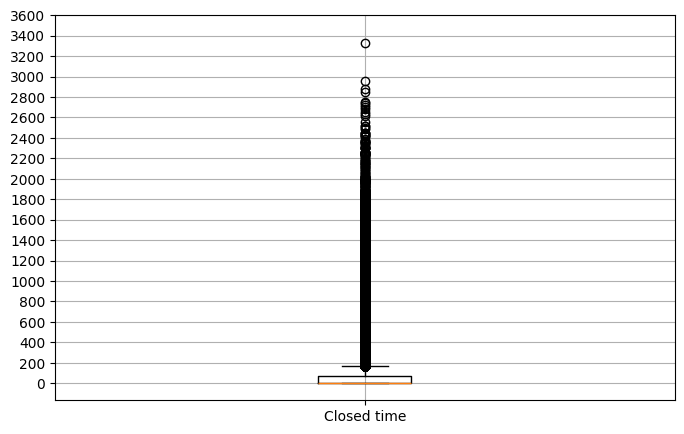

In [14]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.boxplot(closed_issues_frame['complete_time'].to_numpy(), labels=['Closed time'])
ax.set_yticks(np.linspace(0, 3600, 19))
ax.grid()

# 2. Histogram biểu diễn thời gian để một issue được đóng

Text(0.5, 0, 'Closed time(days)')

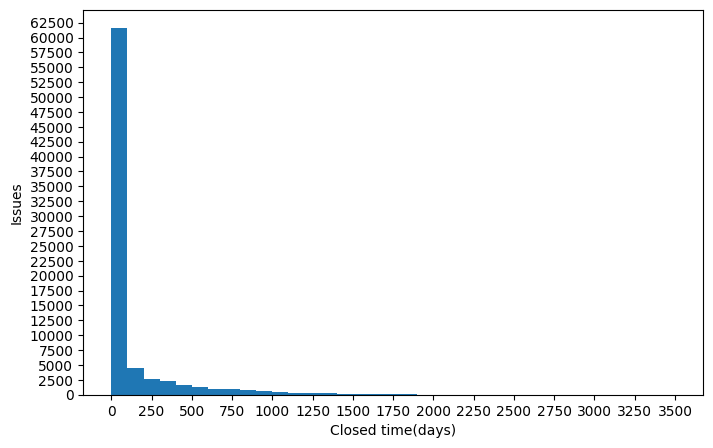

In [15]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.hist(closed_issues_frame['complete_time'], bins = np.linspace(0, 3500, 36))
ax.set_yticks(np.linspace(0, 62500, 26))
ax.set_xticks(np.linspace(0, 3500, 15))
ax.set_ylabel('Issues')
ax.set_xlabel('Closed time(days)')

# 3. Thống kê các số liệu về thời gian một issue được đóng 

In [16]:
closed_issues_frame['complete_time'].describe()

count    79002.000000
mean       116.108035
std        270.860089
min          0.000000
25%          0.000000
50%          3.000000
75%         67.000000
max       3333.000000
Name: complete_time, dtype: float64

# 4. Số lượng issues mỗi nhãn được gắn và phần trăm xuất hiện của chúng trong issues

In [17]:
sorted_labels_frame = pd.DataFrame(sorted_labels, columns=['Labels', 'Labeled'])
sorted_labels_frame['Percentage(%)'] = sorted_labels_frame['Labeled'] / len(issues) * 100
sorted_labels_frame.iloc[:10]

,Labels,Labeled,Percentage(%)
0,bug,50303,54.961540
1,topic:editor,26120,28.538962
2,enhancement,25388,27.739172
3,archived,23197,25.345265
4,topic:core,15283,16.698352
5,topic:rendering,10114,11.050653
6,usability,7000,7.648267
7,topic:3d,6199,6.773087
8,topic:gui,5805,6.342599
9,regression,5608,6.127355


# 5. Scatter plot biểu diễn mối quan hệ giữa số lượng issues đặt ra với số lượng issues được đóng của một người

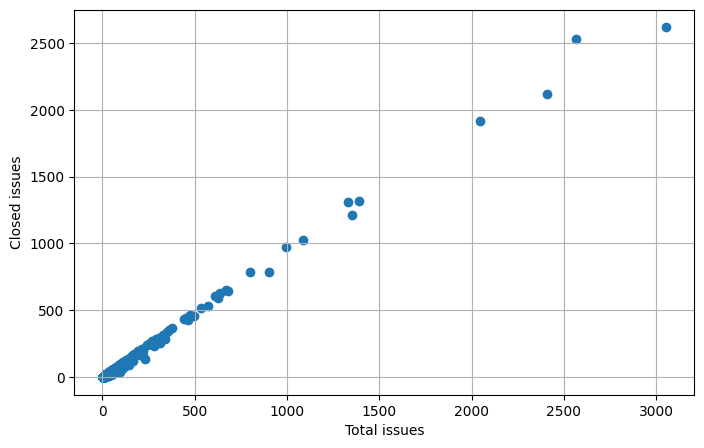

In [18]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.scatter(authors_frame['Total issues'].to_numpy(), authors_frame['Closed issues'].to_numpy())
ax.set_xlabel('Total issues')
ax.set_ylabel('Closed issues')
ax.grid()

# 6. Box plot biểu diễn tỉ lệ được đóng issue của từng người

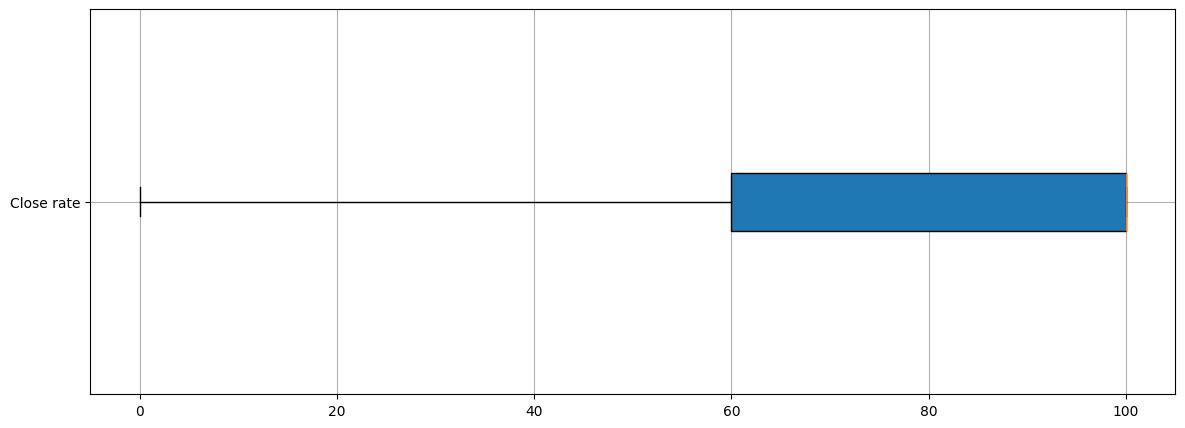

In [19]:
fig, ax = plt.subplots(figsize= (14, 5))
ax.boxplot(authors_frame['Close rate(%)'].to_numpy(), labels=['Close rate'], patch_artist=True, vert=False)
ax.grid()

# 7. Thống kê số liệu về số issues, số issues được đóng và tỉ lệ được đóng của từng người

In [20]:
authors_frame.describe()

,Total issues,Closed issues,Close rate(%)
count,14504.000000,14504.000000,14504.000000
mean,6.310259,5.446911,76.631745
std,54.381470,50.191277,37.255867
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,60.000000
50%,1.000000,1.000000,100.000000
75%,3.000000,2.000000,100.000000
max,3054.000000,2617.000000,100.000000


# 8. 10 nhãn được gắn nhiều nhất trong issues

Text(0.5, 1.0, 'Top 10 most tagged label in issues')

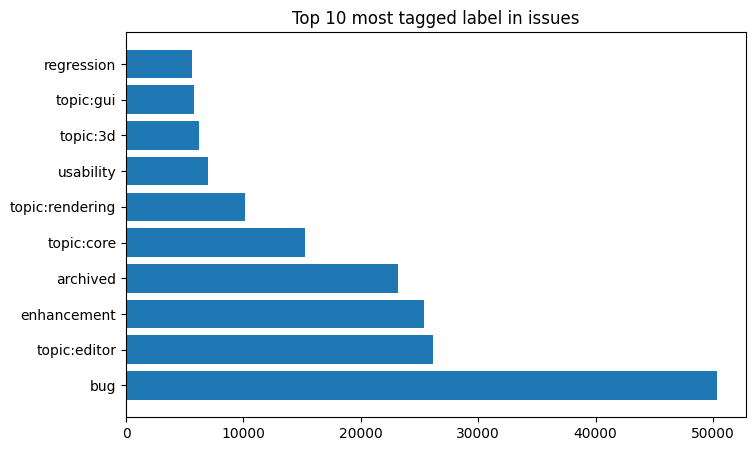

In [21]:
labels = np.array(sorted_labels)
fig, ax = plt.subplots(figsize= (8, 5))
ax.barh(labels[:10, 0], labels[:10, 1].astype('int32'))
ax.set_title('Top 10 most tagged label in issues')

# 9. Biểu đồ biểu diễn số issues được tạo ra mỗi năm

Text(0.5, 1.0, 'Issues created each year')

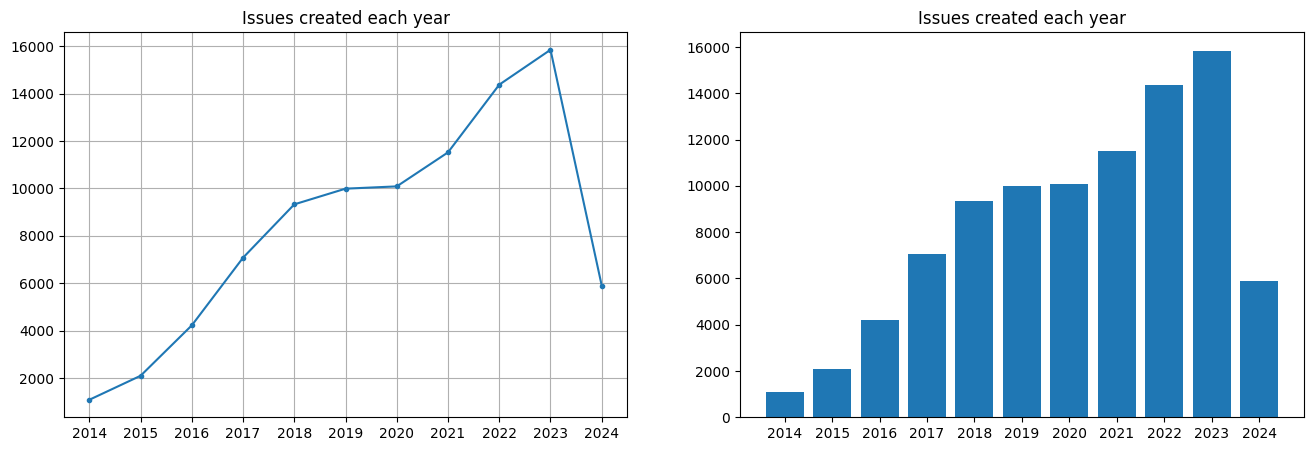

In [22]:
fig, ax = plt.subplots(1, 2, figsize= (16, 5))
ax[0].plot(issues_each_year_frame, marker= '.')
ax[0].set_xticks(np.arange(2014, 2025))
ax[0].grid()
ax[0].set_title('Issues created each year')
ax[1].bar(issues_each_year_frame.index.to_numpy(), issues_each_year_frame['Issues'].to_numpy())
ax[1].set_xticks(np.arange(2014, 2025))
ax[1].set_title('Issues created each year')

# 10. Bar plot biểu diễn số lượng issues và số issues được closed của 10 người đặt nhiều issues nhất

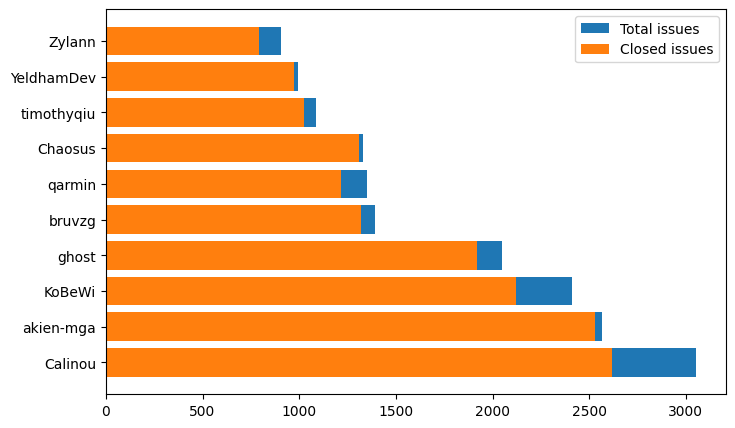

In [23]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.barh(authors_frame.iloc[:10].index, authors_frame['Total issues'].iloc[:10].to_numpy(), label= 'Total issues')
ax.barh(authors_frame.iloc[:10].index, authors_frame['Closed issues'].iloc[:10].to_numpy(), label= 'Closed issues')
ax.legend()